<a href="https://colab.research.google.com/github/pagaspandhutanoyo/Portofolio-Data/blob/main/%22Investasi_Muda_menemukan_hidden_gems_berpotensi_tinggi%22_dalam_data_pemain_FIFA_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
"Investasi Muda menemukan hidden gems berpotensi tinggi" dalam data pemain FIFA 23
```



✅ Strategi Analisis Hidden Gems:
**Definisikan Kriteria Hidden Gem**
Contohnya:

Usia muda → misal usia ≤ 21 tahun

Overall rating cukup baik → misal ≥ 70

Nilai pasar masih rendah → misal < €10 juta

(Opsional) Ada kolom Potential → misal potential ≥ 8

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. PEMBERSIHAN DATA AWAL
# Load dataset
df = pd.read_csv('FIFA23_official_data.csv', encoding='latin1')

In [ ]:
# 1. PEMBERSIHAN DATA AWAL
# Load dataset
# Mengubah encoding dari 'latin1' menjadi 'utf-8' untuk menangani simbol Euro dengan benar
df = pd.read_csv('FIFA23_official_data.csv', encoding='utf-8')

# Konversi Value, Wage, dan Release Clause ke numeric
def currency_to_float(value):
    if isinstance(value, str):
        if 'M' in value:
            return float(value.replace('€', '').replace('M', '')) * 1e6
        elif 'K' in value:
            return float(value.replace('€', '').replace('K', '')) * 1e3
    return np.nan

df['Value'] = df['Value'].apply(currency_to_float)
df['Wage'] = df['Wage'].apply(currency_to_float)
df['Release Clause'] = df['Release Clause'].apply(currency_to_float)

In [ ]:
# Konversi Height ke cm (numeric)
def height_to_cm(height):
    if isinstance(height, str):
        if 'cm' in height:
            return float(height.replace('cm', ''))
        else:
            feet, inches = height.split("'")
            return float(feet) * 30.48 + float(inches.replace('"', '')) * 2.54
    return np.nan

df['Height_cm'] = df['Height'].apply(height_to_cm)

In [ ]:
# Konversi Weight ke kg (numeric)
def weight_to_kg(weight):
    if isinstance(weight, str):
        if 'kg' in weight:
            return float(weight.replace('kg', ''))
        else:
            lbs = float(weight.replace('lbs', ''))
            return lbs * 0.453592
    return np.nan

df['Weight_kg'] = df['Weight'].apply(weight_to_kg)

ANALISIS CODE

In [ ]:
# 2. ANALISIS INVESTASI PEMAIN MUDA
# Filter pemain muda (usia <= 23 tahun)
young_players = df[df['Age'] <= 23].copy()

# Hitung potensi peningkatan (Potential Gap)
young_players['Potential_Gap'] = young_players['Potential'] - young_players['Overall']

# Urutkan berdasarkan potensi tertinggi
top_potential = young_players.sort_values(by='Potential', ascending=False)
# Urutkan berdasarkan potensi pembangan tertinggi
top_growth = young_players.sort_values(by='Potential_Gap', ascending=False)

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

<ipython-input-13-296ff6d606a1>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-13-296ff6d606a1>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


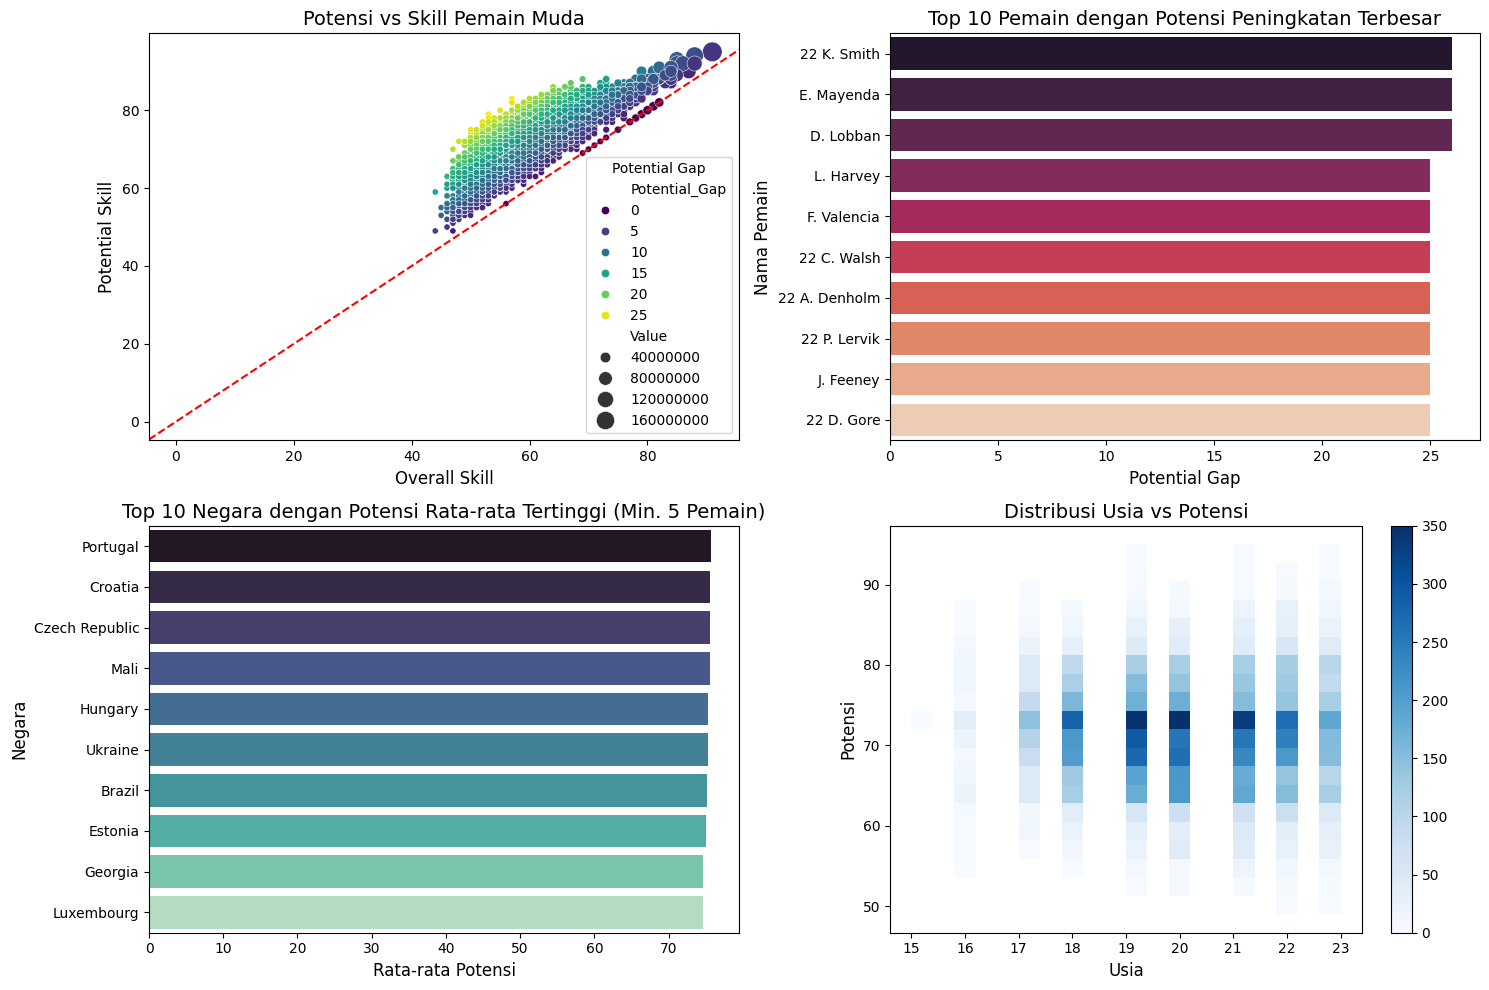

In [ ]:
# 3. VISUALISASI
plt.figure(figsize=(15, 10))
# Scatter plot: Potential vs Overall
plt.subplot(2, 2, 1)
sns.scatterplot(
    data=young_players,
    x='Overall',
    y='Potential',
    hue='Potential_Gap',
    size='Value',
    sizes=(20, 200),
    palette='viridis'
)
plt.title('Potensi vs Skill Pemain Muda', fontsize=14)
plt.xlabel('Overall Skill', fontsize=12)
plt.ylabel('Potential Skill', fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.legend(title='Potential Gap', loc='lower right')

# Bar plot: Top 10 Potential Gap
plt.subplot(2, 2, 2)
top_10_growth = top_growth.head(10)
sns.barplot(
    data=top_10_growth,
    x='Potential_Gap',
    y='Name',
    palette='rocket'
)
plt.title('Top 10 Pemain dengan Potensi Peningkatan Terbesar', fontsize=14)
plt.xlabel('Potential Gap', fontsize=12)
plt.ylabel('Nama Pemain', fontsize=12)

# Bar plot: Negara dengan Rata-rata Potensi Tertinggi
plt.subplot(2, 2, 3)
national_analysis = young_players.groupby('Nationality').agg(
    avg_potential=('Potential', 'mean'),
    player_count=('Name', 'count')
).reset_index()
# Filter negara dengan minimal 5 pemain
national_analysis = national_analysis[national_analysis['player_count'] >= 5]
national_analysis = national_analysis.sort_values('avg_potential', ascending=False).head(10)

sns.barplot(
    data=national_analysis,
    x='avg_potential',
    y='Nationality',
    palette='mako'
)
plt.title('Top 10 Negara dengan Potensi Rata-rata Tertinggi (Min. 5 Pemain)', fontsize=14)
plt.xlabel('Rata-rata Potensi', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Distribusi Usia vs Potential
plt.subplot(2, 2, 4)
sns.histplot(
    data=young_players,
    x='Age',
    y='Potential',
    bins=20,
    cmap='Blues',
    cbar=True
)
plt.title('Distribusi Usia vs Potensi', fontsize=14)
plt.xlabel('Usia', fontsize=12)
plt.ylabel('Potensi', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# 4. ANALISIS INVESTASI
# Identifikasi hidden gems (potensi tinggi, harga relatif rendah)
young_players['Value_per_Potential'] = young_players['Value'] / young_players['Potential']
hidden_gems = young_players.sort_values(by=['Potential', 'Value_per_Potential'], ascending=[False, True])

print("\nTOP 5 HIDDEN GEMS (Potensi Tinggi & Harga Terbaik):")
print(hidden_gems[['Name', 'Age', 'Club', 'Potential', 'Value', 'Nationality']].head(5))

print("\nTOP 5 PROSPEK TERBAIK (Potensi Tertinggi):")
print(top_potential[['Name', 'Age', 'Club', 'Potential', 'Value', 'Nationality']].head(5))

print("\nKLUB DENGAN AKADEMI TERBAIK:")
club_analysis = young_players.groupby('Club').agg(
    avg_potential=('Potential', 'mean'),
    player_count=('Name', 'count')
).reset_index()
club_analysis = club_analysis[club_analysis['player_count'] >= 3]
print(club_analysis.sort_values('avg_potential', ascending=False).head(5))


TOP 5 HIDDEN GEMS (Potensi Tinggi & Harga Terbaik):
                Name  Age                 Club  Potential        Value  \
75         K. Mbappé   23  Paris Saint-Germain         95  190500000.0   
180       E. Haaland   21      Manchester City         94  148000000.0   
214            Pedri   19         FC Barcelona         93  116000000.0   
13506  G. Donnarumma   23  Paris Saint-Germain         92  103500000.0   
849     Vinícius Jr.   21       Real Madrid CF         92  109000000.0   

      Nationality  
75         France  
180        Norway  
214         Spain  
13506       Italy  
849        Brazil  

TOP 5 PROSPEK TERBAIK (Potensi Tertinggi):
                Name  Age                 Club  Potential        Value  \
75         K. Mbappé   23  Paris Saint-Germain         95  190500000.0   
180       E. Haaland   21      Manchester City         94  148000000.0   
214            Pedri   19         FC Barcelona         93  116000000.0   
849     Vinícius Jr.   21       Real Madri

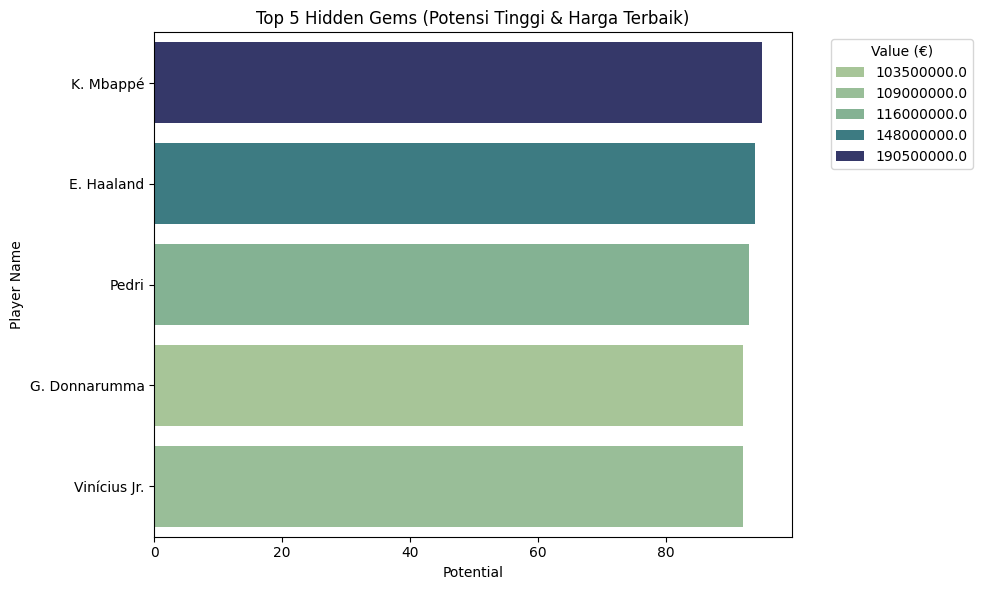

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar chart nilai vs potensi untuk top 5 hidden gems
plt.figure(figsize=(10, 6))
sns.barplot(
    data=hidden_gems.head(5),
    x='Potential',
    y='Name',
    hue='Value',
    palette='crest'
)
plt.title('Top 5 Hidden Gems (Potensi Tinggi & Harga Terbaik)')
plt.xlabel('Potential')
plt.ylabel('Player Name')
plt.legend(title='Value (€)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-16-1f336b6ff2a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


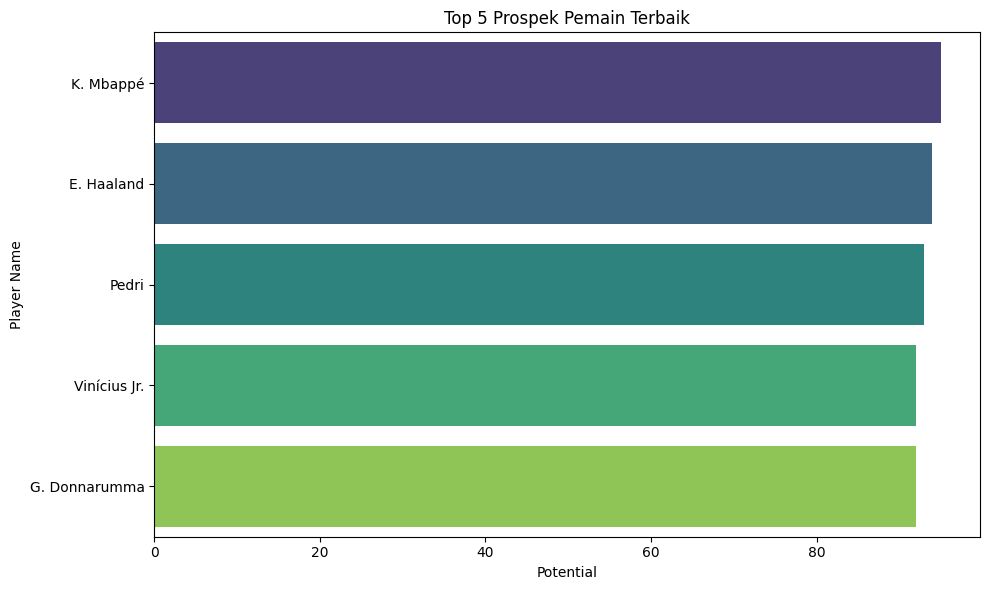

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_potential.head(5),
    x='Potential',
    y='Name',
    palette='viridis'
)
plt.title('Top 5 Prospek Pemain Terbaik')
plt.xlabel('Potential')
plt.ylabel('Player Name')
plt.tight_layout()
plt.show()


<ipython-input-17-1148e49bdaac>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


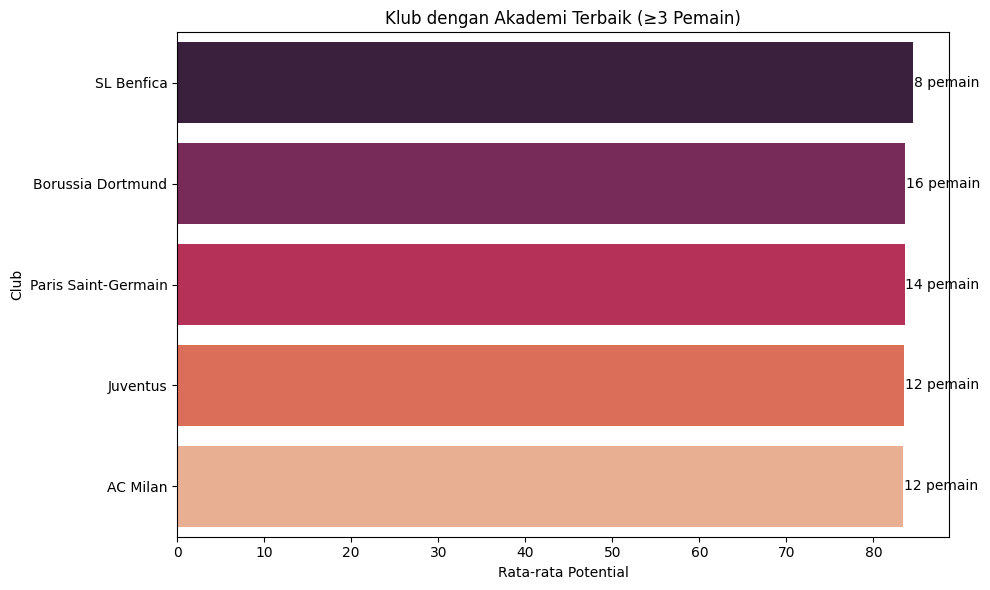

In [ ]:
# Ambil 5 klub terbaik
top_clubs = club_analysis.sort_values('avg_potential', ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_clubs,
    x='avg_potential',
    y='Club',
    palette='rocket'
)
for i, count in enumerate(top_clubs['player_count']):
    plt.text(top_clubs['avg_potential'].values[i] + 0.1, i, f'{count} pemain', va='center')

plt.title('Klub dengan Akademi Terbaik (≥3 Pemain)')
plt.xlabel('Rata-rata Potential')
plt.ylabel('Club')
plt.tight_layout()
plt.show()
